<a href="https://colab.research.google.com/github/taniae27/AprendizajeProfundo/blob/main/Tarea_1_inciso_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4) Red completamente conectada con PyTorch

Implementa una red completamente conectada para la tarea de clasificación de imágenes sobre
el conjunto de Fashion-MNIST, tomando en cuenta las siguiente especificaciones:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as T
from torchinfo import summary
from torch.utils.data import DataLoader, TensorDataset
from torchvision.datasets import  FashionMNIST
import random
from itertools import islice as take

In [ ]:
# directorio de datos
DATA_DIR = '../data'

BATCH_SIZE = 32
ROWS, COLS = 4, 8


def display_grid(xs, titles, rows, cols, figsize=(12, 6)):
    """Displays examples in a grid."""
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    i = 0
    for r in range(rows):
        for c in range(cols):
            ax[r, c].imshow(xs[i], cmap='gray')
            ax[r, c].set_title(titles[i])
            ax[r, c].set_xticklabels([])
            ax[r, c].set_yticklabels([])
            i += 1
    fig.tight_layout()
    plt.show()


def display_batch(x, titles, rows, cols, figsize=(12, 6)):
    """Displays a batch of processed examples in a grid."""
    x *= 255
    # rotamos canales (C x H x W) => (H x W x C)
    x = x.permute(0, 2, 3, 1)
    # convertimos a entero
    x = (x.numpy()).astype(np.uint8)
    # aplanamos canal
    x = x.reshape(*x.shape[:3])
    # desplegamos
    display_grid(x, titles, rows, cols, figsize)

    
def set_seed(seed=0):
    """Initializes pseudo-random number generators."""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    
# reproducibilidad
set_seed()

In [ ]:
ds = FashionMNIST(
    # directorio de datos
    root=DATA_DIR,
    # subconjunto de entrenamiento
    train=True,
    # convertir la imagen a ndarray
    transform=np.array,
    # descargar el conjunto
    download=True
)

images[0] shape=(28, 28) dtype=uint8


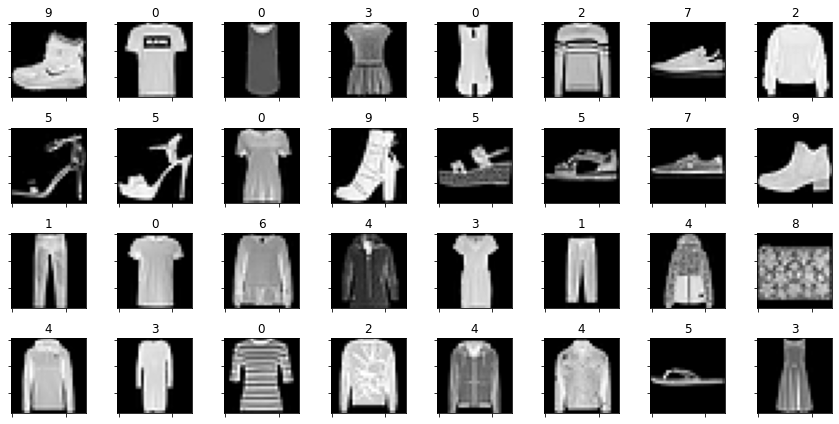

In [ ]:
images, labels = [], []
for i in range(BATCH_SIZE):
    x, y = ds[i]
    images.append(x)
    labels.append(y)

# desplegamos
print(f'images[0] shape={images[0].shape} dtype={images[0].dtype}')
titles = [str(y) for y in labels]
display_grid(images, titles, ROWS, COLS)

#### Entrenamiento

x shape=torch.Size([32, 1, 28, 28]) dtype=torch.float32
y shape=torch.Size([32]) dtype=torch.int64


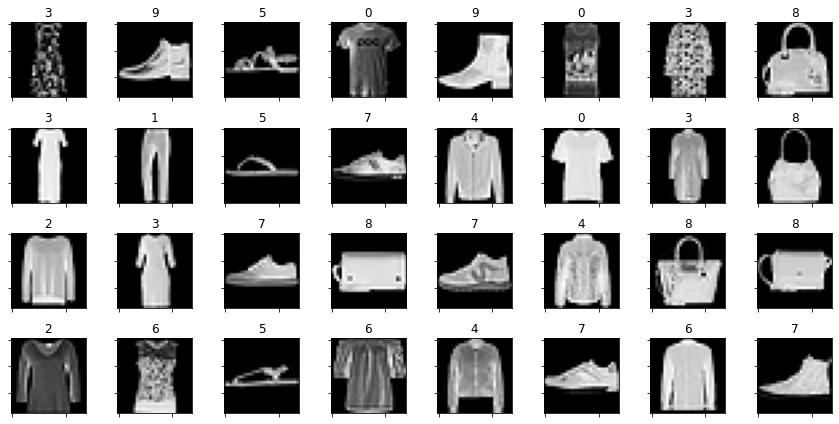

In [ ]:
# transformación que convierte una imagen:
#   de numpy.ndarray    (H x W x C) en rango [0, 255]
#   a torch.FloatTensor (C x H x W) en rango [0, 1]
tsfm = T.ToTensor()

# creamos un Dataset
trn_ds = FashionMNIST(
    # directorio de datos
    root=DATA_DIR,
    # subconjunto de entrenamiento
    train=True,
    # transformación
    transform=tsfm
)

# creamos un DataLoader
trn_dl = DataLoader(
    # conjunto
    trn_ds,
    # tamaño del lote
    batch_size=BATCH_SIZE,
    # desordenar
    shuffle=True
)

# desplegamos un lote de imágenes
x, y = next(iter(trn_dl))
print(f'x shape={x.shape} dtype={x.dtype}')
print(f'y shape={y.shape} dtype={y.dtype}')
display_batch(x, y.tolist(), ROWS, COLS)

#### Prueba

x shape=torch.Size([32, 1, 28, 28]) dtype=torch.float32
y shape=torch.Size([32]) dtype=torch.int64


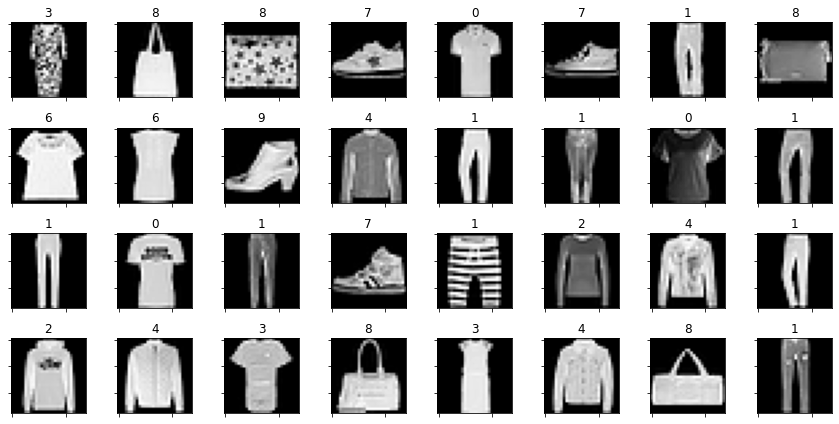

In [ ]:
# creamos un Dataset
tst_ds = FashionMNIST(
    # directorio de datos
    root=DATA_DIR, 
    # subconjunto de entrenamiento
    train=False,
    # transformación
    transform=tsfm
)

# creamos un DataLoader
tst_dl = DataLoader(
    # subconjunto
    tst_ds,
    # tamaño del lote
    batch_size=BATCH_SIZE,
    # desordenar
    shuffle=True
)

# desplegamos un lote de imágenes
x, y = next(iter(tst_dl))
print(f'x shape={x.shape} dtype={x.dtype}')
print(f'y shape={y.shape} dtype={y.dtype}')
display_batch(x, y.tolist(), ROWS, COLS)

### Definición de la arquitectura

In [ ]:
# definición del modelo
class FCN_1(nn.Module):

    # inicializador
    def __init__(self):

        # inicilización del objeto padre, obligatorio
        super().__init__()

        # tamaño de las capas
        self.I = 1 * 28 * 28
        FC1, FC2 = 128, 10

        # definición de capas
        self.cls = nn.Sequential(
            # aplanamos la matriz de píxeles a un vector
            # [N, 1, 28, 28] => [N, 1x28x28]
            nn.Flatten(),
            # fc1
            # [N, 1x28x28] => [N, 128]
            nn.Linear(self.I, FC1),
            nn.Tanh(),
            # fc2
            # [N, 128] => [N, 10]
            nn.Linear(FC1, FC2)
        )

    # método para inferencia
    def forward(self, x):
        # [N, 1x28x28]
        x = self.cls(x)
        return x

In [ ]:
# definición del modelo
class FCN_2(nn.Module):

    # inicializador
    def __init__(self):

        # inicilización del objeto padre, obligatorio
        super().__init__()

        # tamaño de las capas
        self.I = 1 * 28 * 28
        FC1, FC2 = 128, 10

        # definición de capas
        self.cls = nn.Sequential(
            # aplanamos la matriz de píxeles a un vector
            # [N, 1, 28, 28] => [N, 1x28x28]
            nn.Flatten(),
            # fc1
            # [N, 1x28x28] => [N, 128]
            nn.Linear(self.I, FC1),
            nn.ReLU(),
            # fc2
            # [N, 128] => [N, 10]
            nn.Linear(FC1, FC2)
        )

    # método para inferencia
    def forward(self, x):
        # [N, 1x28x28]
        x = self.cls(x)
        return x

In [ ]:
# definición del modelo
class FCN_3(nn.Module):

    # inicializador
    def __init__(self):

        # inicilización del objeto padre, obligatorio
        super().__init__()

        # tamaño de las capas
        self.I = 1 * 28 * 28
        FC1, FC2 = 20, 10

        # definición de capas
        self.cls = nn.Sequential(
            # aplanamos la matriz de píxeles a un vector
            # [N, 1, 28, 28] => [N, 1x28x28]
            nn.Flatten(),
            # fc1
            # [N, 1x28x28] => [N, 128]
            nn.Linear(self.I, FC1),
            nn.Tanh(),
            # fc2
            # [N, 128] => [N, 10]
            nn.Linear(FC1, FC2)
        )

    # método para inferencia
    def forward(self, x):
        # [N, 1x28x28]
        x = self.cls(x)
        return x

In [ ]:
# definición del modelo
class FCN_4(nn.Module):

    # inicializador
    def __init__(self):

        # inicilización del objeto padre, obligatorio
        super().__init__()

        # tamaño de las capas
        self.I = 1 * 28 * 28
        FC1, FC2 = 20, 10

        # definición de capas
        self.cls = nn.Sequential(
            # aplanamos la matriz de píxeles a un vector
            # [N, 1, 28, 28] => [N, 1x28x28]
            nn.Flatten(),
            # fc1
            # [N, 1x28x28] => [N, 128]
            nn.Linear(self.I, FC1),
            nn.ReLU(),
            # fc2
            # [N, 128] => [N, 10]
            nn.Linear(FC1, FC2)
        )

    # método para inferencia
    def forward(self, x):
        # [N, 1x28x28]
        x = self.cls(x)
        return x

In [ ]:
# definición del modelo
class FCN_5(nn.Module):

    # inicializador
    def __init__(self):

        # inicilización del objeto padre, obligatorio
        super().__init__()

        # tamaño de las capas
        self.I = 1 * 28 * 28
        FC1, FC2, FC3 = 20, 20,10

        # definición de capas
        self.cls = nn.Sequential(
            # aplanamos la matriz de píxeles a un vector
            # [N, 1, 28, 28] => [N, 1x28x28]
            nn.Flatten(),
            # fc1
            # [N, 1x28x28] => [N, 128]
            nn.Linear(self.I, FC1),
            nn.ReLU(),
            # fc2
            # [N, 128] => [N, 10]
            nn.Linear(FC1, FC2),
            nn.ReLU(),
            nn.Linear(FC2, FC3)
        )

    # método para inferencia
    def forward(self, x):
        # [N, 1x28x28]
        x = self.cls(x)
        return x

In [ ]:
# definición del modelo
class FCN_6(nn.Module):

    # inicializador
    def __init__(self):

        # inicilización del objeto padre, obligatorio
        super().__init__()

        # tamaño de las capas
        self.I = 1 * 28 * 28
        FC1, FC2, FC3 = 20, 10,10

        # definición de capas
        self.cls = nn.Sequential(
            # aplanamos la matriz de píxeles a un vector
            # [N, 1, 28, 28] => [N, 1x28x28]
            nn.Flatten(),
            # fc1
            # [N, 1x28x28] => [N, 128]
            nn.Linear(self.I, FC1),
            nn.ReLU(),
            # fc2
            # [N, 128] => [N, 10]
            nn.Linear(FC1, FC2),
            nn.ReLU(),
            nn.Linear(FC2, FC3)
        )

    # método para inferencia
    def forward(self, x):
        # [N, 1x28x28]
        x = self.cls(x)
        return x

In [ ]:
# definición del modelo
class FCN_7(nn.Module):

    # inicializador
    def __init__(self):

        # inicilización del objeto padre, obligatorio
        super().__init__()

        # tamaño de las capas
        self.I = 1 * 28 * 28
        FC1, FC2 = 40, 10

        # definición de capas
        self.cls = nn.Sequential(
            # aplanamos la matriz de píxeles a un vector
            # [N, 1, 28, 28] => [N, 1x28x28]
            nn.Flatten(),
            # fc1
            # [N, 1x28x28] => [N, 128]
            nn.Linear(self.I, FC1),
            nn.ReLU(),
            # fc2
            # [N, 128] => [N, 10]
            nn.Linear(FC1, FC2)
        )

    # método para inferencia
    def forward(self, x):
        # [N, 1x28x28]
        x = self.cls(x)
        return x


###  Ciclo de entrenamiento

In [ ]:
def train_epoch(dl, model, opt):

    # por cada lote
    for x, y_true in dl:
        
        
        # computamos logits
        y_lgts = model(x)
        
        # computamos la pérdida
        loss = F.cross_entropy(y_lgts, y_true)
        
        # vaciamos los gradientes
        opt.zero_grad()
        
        # retropropagamos
        loss.backward()
        
        # actualizamos parámetros
        opt.step()


def eval_epoch(dl, model, num_batches=None):

    # evitamos que se registren las operaciones 
    # en la gráfica de cómputo
    with torch.no_grad():

        # historiales
        losses, accs = [], []

        # validación de la época con num_batches
        # si num_batches==None, se usan todos los lotes
        for x, y_true in take(dl, num_batches):

            # computamos los logits
            y_lgts = model(x)

            # computamos los puntajes
            y_prob = F.softmax(y_lgts, 1)

            # computamos la clases
            y_pred = torch.argmax(y_prob, 1)

            # computamos la pérdida
            loss = F.cross_entropy(y_lgts, y_true)

            # computamos la exactitud
            acc = (y_true == y_pred).type(torch.float32).mean()

            # guardamos históricos
            losses.append(loss.item())
            accs.append(acc.item())

        # promediamos
        loss = np.mean(losses) * 100
        acc = np.mean(accs) * 100

        return loss, acc
        
        
def train(model, trn_dl, tst_dl, lr=1e-3, epochs=25,
          trn_batches=None, tst_batches=None):

    # historiales
    loss_hist, acc_hist = [], []
    
    # optimizador
    opt = optim.SGD(model.parameters(), lr=lr)

    # ciclo de entrenamiento
    for epoch in range(epochs):

        # entrenamos la época
        train_epoch(trn_dl, model, opt)

        # evaluamos la época en entrenamiento
        trn_loss, trn_acc = eval_epoch(trn_dl, model, trn_batches)
        # evaluamos la época en prueba
        tst_loss, tst_acc = eval_epoch(tst_dl, model, tst_batches)

        # guardamos historial
        loss_hist.append([trn_loss, tst_loss])
        acc_hist.append([trn_acc, tst_acc])

        # imprimimos progreso
        print(f'E{epoch:02} '
              f'loss=[{trn_loss:6.2f},{tst_loss:6.2f}] '
              f'acc=[{trn_acc:5.2f},{tst_acc:5.2f}]')

    return loss_hist, acc_hist

### A) Explora con diferentes número de neuronas, capas, funciones de activación e hiperparámetros.

Entrenamos un modelo:

In [ ]:
# instanciamos un modelo
model_1= FCN_1()
# entrenamos
loss_hist_1, acc_hist_1 = train(model_1, trn_dl, tst_dl)

E00 loss=[135.30,135.95] acc=[65.24,64.65]
E01 loss=[102.21,103.30] acc=[68.51,67.38]
E02 loss=[ 88.07, 89.49] acc=[71.04,69.67]
E03 loss=[ 79.96, 81.59] acc=[73.45,72.18]
E04 loss=[ 74.50, 76.26] acc=[75.26,73.82]
E05 loss=[ 70.39, 72.26] acc=[76.45,75.01]
E06 loss=[ 67.19, 69.16] acc=[77.39,75.94]
E07 loss=[ 64.52, 66.54] acc=[78.31,77.13]
E08 loss=[ 62.37, 64.44] acc=[79.02,77.90]
E09 loss=[ 60.45, 62.69] acc=[79.78,78.40]
E10 loss=[ 58.85, 61.13] acc=[80.18,78.86]
E11 loss=[ 57.46, 59.82] acc=[80.60,79.41]
E12 loss=[ 56.20, 58.61] acc=[81.08,79.60]
E13 loss=[ 55.12, 57.59] acc=[81.36,80.06]
E14 loss=[ 54.16, 56.68] acc=[81.59,80.40]
E15 loss=[ 53.42, 56.04] acc=[81.89,80.43]
E16 loss=[ 52.49, 55.09] acc=[82.22,80.91]
E17 loss=[ 51.82, 54.50] acc=[82.29,81.15]
E18 loss=[ 51.14, 53.90] acc=[82.52,81.25]
E19 loss=[ 50.53, 53.21] acc=[82.63,81.38]
E20 loss=[ 49.98, 52.76] acc=[82.80,81.59]
E21 loss=[ 49.48, 52.25] acc=[82.96,81.74]
E22 loss=[ 49.01, 51.84] acc=[83.10,81.83]
E23 loss=[ 

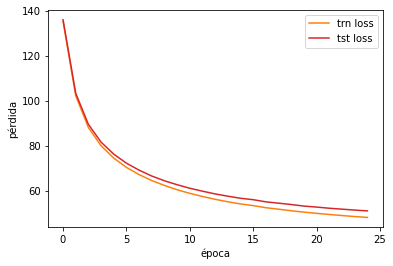

In [ ]:
trn_loss_1, tst_loss_1 = zip(*loss_hist_1)
plt.plot(trn_loss_1, 'tab:orange', label='trn loss')
plt.plot(tst_loss_1, 'tab:red', label='tst loss')
plt.legend(loc='upper right')
plt.xlabel('época')
plt.ylabel('pérdida')
plt.show()

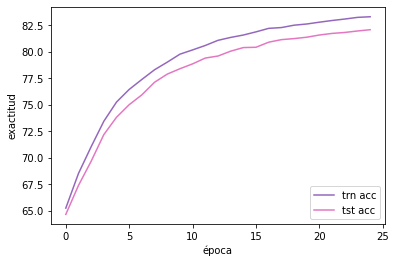

In [ ]:
trn_acc_1, tst_acc_1 = zip(*acc_hist_1)
plt.plot(trn_acc_1, 'tab:purple', label='trn acc')
plt.plot(tst_acc_1, 'tab:pink', label='tst acc')
plt.legend(loc='lower right')
plt.xlabel('época')
plt.ylabel('exactitud')
plt.show()

In [ ]:
# instanciamos un modelo
model_2= FCN_2()
# entrenamos
loss_hist_2, acc_hist_2 = train(model_2, trn_dl, tst_dl)

E00 loss=[147.11,147.55] acc=[64.63,63.75]
E01 loss=[105.13,106.03] acc=[66.82,65.99]
E02 loss=[ 88.69, 89.92] acc=[69.80,68.63]
E03 loss=[ 80.14, 81.51] acc=[72.45,71.11]
E04 loss=[ 74.55, 76.14] acc=[74.50,73.13]
E05 loss=[ 70.42, 72.16] acc=[76.18,74.76]
E06 loss=[ 67.24, 69.05] acc=[77.62,76.31]
E07 loss=[ 64.44, 66.33] acc=[78.60,77.17]
E08 loss=[ 62.20, 64.05] acc=[79.33,77.97]
E09 loss=[ 60.25, 62.25] acc=[79.98,78.67]
E10 loss=[ 58.60, 60.59] acc=[80.66,79.18]
E11 loss=[ 57.21, 59.30] acc=[80.93,79.56]
E12 loss=[ 55.99, 58.19] acc=[81.38,79.99]
E13 loss=[ 54.90, 57.13] acc=[81.71,80.32]
E14 loss=[ 53.93, 56.20] acc=[82.05,80.67]
E15 loss=[ 53.05, 55.35] acc=[82.32,81.03]
E16 loss=[ 52.32, 54.69] acc=[82.53,81.20]
E17 loss=[ 51.65, 54.15] acc=[82.68,81.34]
E18 loss=[ 51.06, 53.47] acc=[82.73,81.65]
E19 loss=[ 50.47, 53.00] acc=[83.04,81.73]
E20 loss=[ 49.94, 52.54] acc=[83.14,81.72]
E21 loss=[ 49.53, 52.21] acc=[83.18,81.76]
E22 loss=[ 49.02, 51.71] acc=[83.43,82.08]
E23 loss=[ 

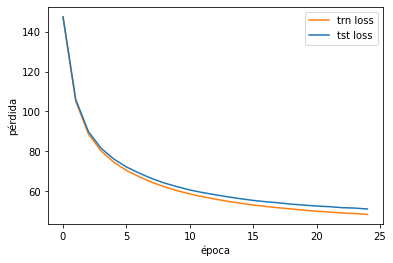

In [ ]:
trn_loss_2, tst_loss_2 = zip(*loss_hist_2)
plt.plot(trn_loss_2, 'tab:orange', label='trn loss')
plt.plot(tst_loss_2, 'tab:blue', label='tst loss')
plt.legend(loc='upper right')
plt.xlabel('época')
plt.ylabel('pérdida')
plt.show()

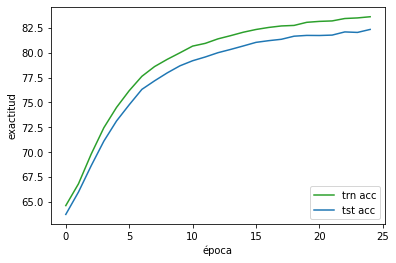

In [ ]:
trn_acc_2, tst_acc_2 = zip(*acc_hist_2)
plt.plot(trn_acc_2, 'tab:green', label='trn acc')
plt.plot(tst_acc_2, 'tab:blue', label='tst acc')
plt.legend(loc='lower right')
plt.xlabel('época')
plt.ylabel('exactitud')
plt.show()

In [ ]:
# instanciamos un modelo
model_3= FCN_3()
# entrenamos
loss_hist_3, acc_hist_3 = train(model_3, trn_dl, tst_dl)

E00 loss=[150.23,150.89] acc=[62.93,62.46]
E01 loss=[119.97,120.98] acc=[67.11,66.33]
E02 loss=[103.14,104.43] acc=[68.76,67.60]
E03 loss=[ 92.60, 94.09] acc=[70.85,69.65]
E04 loss=[ 85.40, 86.98] acc=[72.41,71.28]
E05 loss=[ 80.12, 81.84] acc=[73.97,72.65]
E06 loss=[ 75.99, 77.81] acc=[74.91,73.48]
E07 loss=[ 72.70, 74.60] acc=[75.84,74.50]
E08 loss=[ 69.97, 71.90] acc=[76.58,75.28]
E09 loss=[ 67.64, 69.70] acc=[77.37,76.06]
E10 loss=[ 65.68, 67.72] acc=[77.91,76.57]
E11 loss=[ 63.92, 66.02] acc=[78.36,77.10]
E12 loss=[ 62.40, 64.65] acc=[78.84,77.52]
E13 loss=[ 61.04, 63.24] acc=[79.27,77.75]
E14 loss=[ 59.81, 62.16] acc=[79.91,78.31]
E15 loss=[ 58.69, 61.01] acc=[80.22,78.72]
E16 loss=[ 57.72, 60.01] acc=[80.45,78.96]
E17 loss=[ 56.76, 59.13] acc=[80.78,79.25]
E18 loss=[ 55.91, 58.39] acc=[81.07,79.59]
E19 loss=[ 55.13, 57.56] acc=[81.33,80.03]
E20 loss=[ 54.43, 56.87] acc=[81.42,80.12]
E21 loss=[ 53.71, 56.27] acc=[81.76,80.33]
E22 loss=[ 53.06, 55.59] acc=[82.00,80.70]
E23 loss=[ 

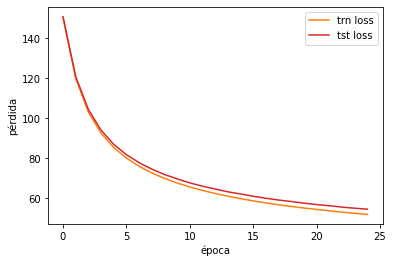

In [ ]:
trn_loss_3, tst_loss_3 = zip(*loss_hist_3)
plt.plot(trn_loss_3, 'tab:orange', label='trn loss')
plt.plot(tst_loss_3, 'tab:red', label='tst loss')
plt.legend(loc='upper right')
plt.xlabel('época')
plt.ylabel('pérdida')
plt.show()

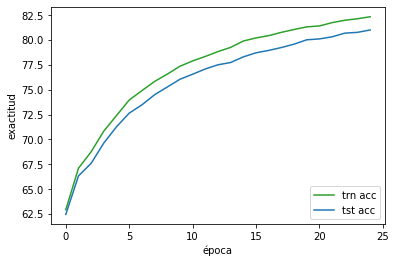

In [ ]:
trn_acc_3, tst_acc_3 = zip(*acc_hist_3)
plt.plot(trn_acc_3, 'tab:green', label='trn acc')
plt.plot(tst_acc_3, 'tab:blue', label='tst acc')
plt.legend(loc='lower right')
plt.xlabel('época')
plt.ylabel('exactitud')
plt.show()

In [ ]:
# instanciamos un modelo
model_4= FCN_4()
# entrenamos
loss_hist_4, acc_hist_4 = train(model_4, trn_dl, tst_dl)

E00 loss=[148.85,149.43] acc=[62.10,61.29]
E01 loss=[106.58,107.57] acc=[66.35,65.53]
E02 loss=[ 90.17, 91.36] acc=[68.77,67.57]
E03 loss=[ 81.65, 83.18] acc=[70.92,69.49]
E04 loss=[ 75.94, 77.59] acc=[73.70,72.22]
E05 loss=[ 71.81, 73.63] acc=[75.72,74.14]
E06 loss=[ 68.44, 70.33] acc=[76.91,75.67]
E07 loss=[ 65.66, 67.52] acc=[77.93,76.81]
E08 loss=[ 63.27, 65.25] acc=[79.15,77.73]
E09 loss=[ 61.27, 63.29] acc=[79.69,78.47]
E10 loss=[ 59.57, 61.70] acc=[80.36,79.04]
E11 loss=[ 58.07, 60.29] acc=[80.76,79.51]
E12 loss=[ 56.79, 59.00] acc=[81.23,79.80]
E13 loss=[ 55.73, 58.05] acc=[81.45,80.16]
E14 loss=[ 54.72, 56.95] acc=[81.75,80.55]
E15 loss=[ 53.90, 56.26] acc=[82.06,80.87]
E16 loss=[ 53.09, 55.47] acc=[82.20,81.18]
E17 loss=[ 52.43, 54.90] acc=[82.34,81.29]
E18 loss=[ 51.78, 54.28] acc=[82.48,81.24]
E19 loss=[ 51.18, 53.67] acc=[82.72,81.57]
E20 loss=[ 50.68, 53.26] acc=[82.80,81.72]
E21 loss=[ 50.26, 52.86] acc=[82.85,81.79]
E22 loss=[ 49.80, 52.42] acc=[82.99,81.74]
E23 loss=[ 

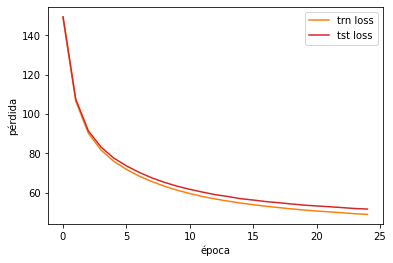

In [ ]:
trn_loss_4, tst_loss_4 = zip(*loss_hist_4)
plt.plot(trn_loss_4, 'tab:orange', label='trn loss')
plt.plot(tst_loss_4, 'tab:red', label='tst loss')
plt.legend(loc='upper right')
plt.xlabel('época')
plt.ylabel('pérdida')
plt.show()

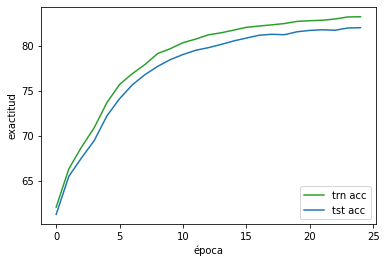

In [ ]:
trn_acc_4, tst_acc_4 = zip(*acc_hist_4)
plt.plot(trn_acc_4, 'tab:green', label='trn acc')
plt.plot(tst_acc_4, 'tab:blue', label='tst acc')
plt.legend(loc='lower right')
plt.xlabel('época')
plt.ylabel('exactitud')
plt.show()

In [ ]:
# instanciamos un modelo
model_5= FCN_5()
# entrenamos
loss_hist_5, acc_hist_5 = train(model_5, trn_dl, tst_dl)

E00 loss=[214.46,214.54] acc=[19.00,19.13]
E01 loss=[183.44,183.56] acc=[36.51,36.42]
E02 loss=[143.08,143.53] acc=[51.30,50.89]
E03 loss=[109.93,110.74] acc=[61.75,60.85]
E04 loss=[ 93.94, 95.10] acc=[65.10,64.27]
E05 loss=[ 85.12, 86.42] acc=[67.66,67.08]
E06 loss=[ 79.54, 81.23] acc=[69.60,68.89]
E07 loss=[ 75.79, 77.62] acc=[71.01,70.02]
E08 loss=[ 72.88, 74.88] acc=[72.79,72.06]
E09 loss=[ 70.34, 72.29] acc=[74.39,73.76]
E10 loss=[ 68.16, 70.20] acc=[75.41,74.58]
E11 loss=[ 66.08, 68.25] acc=[76.01,74.97]
E12 loss=[ 64.42, 66.61] acc=[76.83,76.01]
E13 loss=[ 62.63, 64.93] acc=[77.52,76.51]
E14 loss=[ 61.48, 63.85] acc=[78.03,77.01]
E15 loss=[ 60.03, 62.44] acc=[78.60,77.55]
E16 loss=[ 58.91, 61.40] acc=[79.07,77.96]
E17 loss=[ 58.02, 60.41] acc=[79.33,78.29]
E18 loss=[ 56.93, 59.53] acc=[79.93,78.73]
E19 loss=[ 55.99, 58.73] acc=[80.54,79.44]
E20 loss=[ 55.15, 57.81] acc=[80.87,79.69]
E21 loss=[ 54.34, 57.05] acc=[81.13,80.06]
E22 loss=[ 53.53, 56.34] acc=[81.35,80.28]
E23 loss=[ 

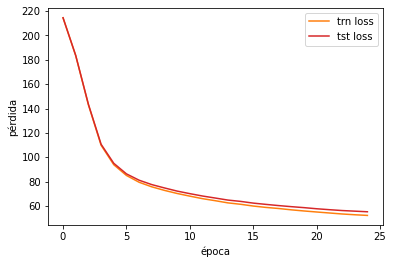

In [ ]:
trn_loss_5, tst_loss_5 = zip(*loss_hist_5)
plt.plot(trn_loss_5, 'tab:orange', label='trn loss')
plt.plot(tst_loss_5, 'tab:red', label='tst loss')
plt.legend(loc='upper right')
plt.xlabel('época')
plt.ylabel('pérdida')
plt.show()

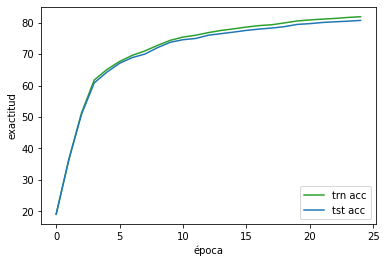

In [ ]:
trn_acc_5, tst_acc_5 = zip(*acc_hist_5)
plt.plot(trn_acc_5, 'tab:green', label='trn acc')
plt.plot(tst_acc_5, 'tab:blue', label='tst acc')
plt.legend(loc='lower right')
plt.xlabel('época')
plt.ylabel('exactitud')
plt.show()

In [ ]:
# instanciamos un modelo
model_6= FCN_6()
# entrenamos
loss_hist_6, acc_hist_6 = train(model_6, trn_dl, tst_dl)

E00 loss=[215.92,215.96] acc=[11.90,11.95]
E01 loss=[177.38,177.62] acc=[37.71,38.03]
E02 loss=[135.82,136.44] acc=[47.66,47.10]
E03 loss=[114.07,115.06] acc=[56.07,55.70]
E04 loss=[101.80,102.89] acc=[62.15,61.63]
E05 loss=[ 93.32, 94.45] acc=[64.59,63.99]
E06 loss=[ 87.06, 88.20] acc=[66.34,65.33]
E07 loss=[ 82.39, 83.70] acc=[68.21,67.36]
E08 loss=[ 78.63, 79.93] acc=[71.08,70.14]
E09 loss=[ 75.28, 76.54] acc=[72.78,72.12]
E10 loss=[ 72.22, 73.63] acc=[73.27,72.39]
E11 loss=[ 69.29, 70.80] acc=[75.62,74.51]
E12 loss=[ 66.52, 68.20] acc=[76.75,75.83]
E13 loss=[ 64.19, 66.05] acc=[77.74,76.55]
E14 loss=[ 62.28, 64.19] acc=[78.36,77.40]
E15 loss=[ 60.56, 62.49] acc=[78.94,78.08]
E16 loss=[ 59.26, 61.24] acc=[79.30,78.22]
E17 loss=[ 57.91, 60.04] acc=[79.83,78.78]
E18 loss=[ 56.93, 59.11] acc=[80.36,79.24]
E19 loss=[ 55.96, 58.22] acc=[80.55,79.47]
E20 loss=[ 55.51, 57.72] acc=[80.70,79.67]
E21 loss=[ 54.49, 56.96] acc=[81.09,80.03]
E22 loss=[ 53.89, 56.44] acc=[81.25,80.17]
E23 loss=[ 

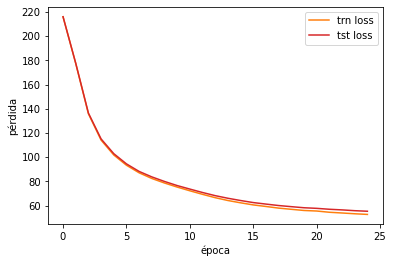

In [ ]:
trn_loss_6, tst_loss_6 = zip(*loss_hist_6)
plt.plot(trn_loss_6, 'tab:orange', label='trn loss')
plt.plot(tst_loss_6, 'tab:red', label='tst loss')
plt.legend(loc='upper right')
plt.xlabel('época')
plt.ylabel('pérdida')
plt.show()

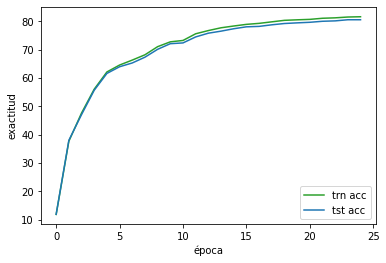

In [ ]:
trn_acc_6, tst_acc_6 = zip(*acc_hist_6)
plt.plot(trn_acc_6, 'tab:green', label='trn acc')
plt.plot(tst_acc_6, 'tab:blue', label='tst acc')
plt.legend(loc='lower right')
plt.xlabel('época')
plt.ylabel('exactitud')
plt.show()

In [ ]:
# instanciamos un modelo
model_7= FCN_7()
# entrenamos
loss_hist_7, acc_hist_7 = train(model_7, trn_dl, tst_dl)

E00 loss=[157.92,158.32] acc=[64.29,63.42]
E01 loss=[111.65,112.51] acc=[67.07,66.20]
E02 loss=[ 92.54, 93.68] acc=[69.88,68.65]
E03 loss=[ 82.46, 83.78] acc=[72.77,71.30]
E04 loss=[ 76.06, 77.60] acc=[75.07,73.57]
E05 loss=[ 71.55, 73.24] acc=[76.10,74.87]
E06 loss=[ 67.98, 69.75] acc=[77.13,75.71]
E07 loss=[ 65.14, 66.95] acc=[78.42,77.05]
E08 loss=[ 62.80, 64.75] acc=[79.10,77.80]
E09 loss=[ 60.89, 62.92] acc=[79.91,78.48]
E10 loss=[ 59.26, 61.37] acc=[80.29,78.86]
E11 loss=[ 57.82, 59.98] acc=[80.79,79.44]
E12 loss=[ 56.56, 58.75] acc=[81.16,79.91]
E13 loss=[ 55.57, 57.85] acc=[81.21,80.16]
E14 loss=[ 54.54, 56.87] acc=[81.69,80.61]
E15 loss=[ 53.69, 56.09] acc=[82.02,80.77]
E16 loss=[ 52.97, 55.43] acc=[82.17,80.98]
E17 loss=[ 52.22, 54.76] acc=[82.34,81.17]
E18 loss=[ 51.56, 54.12] acc=[82.52,81.35]
E19 loss=[ 51.04, 53.67] acc=[82.78,81.30]
E20 loss=[ 50.47, 53.12] acc=[82.92,81.54]
E21 loss=[ 50.02, 52.72] acc=[82.96,81.71]
E22 loss=[ 49.54, 52.27] acc=[83.16,81.87]
E23 loss=[ 

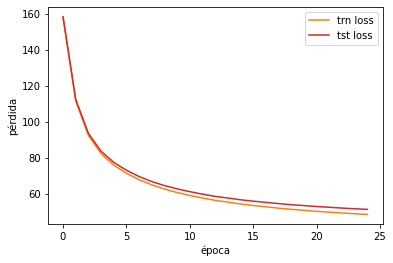

In [ ]:
trn_loss_7, tst_loss_7 = zip(*loss_hist_7)
plt.plot(trn_loss_7, 'tab:orange', label='trn loss')
plt.plot(tst_loss_7, 'tab:red', label='tst loss')
plt.legend(loc='upper right')
plt.xlabel('época')
plt.ylabel('pérdida')
plt.show()

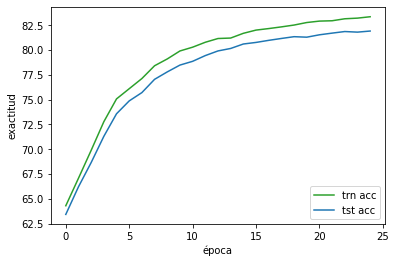

In [ ]:
trn_acc_7, tst_acc_7 = zip(*acc_hist_7)
plt.plot(trn_acc_7, 'tab:green', label='trn acc')
plt.plot(tst_acc_7, 'tab:blue', label='tst acc')
plt.legend(loc='lower right')
plt.xlabel('época')
plt.ylabel('exactitud')
plt.show()

### B) Discute tus resultados con las distintas configuraciones.

    Se generaron 7 redes densas con las siguientes caracteristicas:

    1.- 2 capas (128 neuronas y 10 neuronas) con funcion de activacion Tanh 
    2.- 2 capas (128 neuronas y 10 neuronas) con funcion de activacion ReLU
    3.- 2 capas (20 neuronas y 10 neuronas) con funcion de activacion Tanh
    4.- 2 capas (20 neuronas y 10 neuronas) con funcion de activacion ReLU
    5.- 3 capas (20 neuronas, 20 neuronas y 10 neuronas) con funcion de activacion ReLU
    6.- 3 capas (20 neuronas, 10 neuronas y 10 neuronas) con funcion de activacion ReLU
    7.- 2 capas (40 neuronas y 10 neuronas) con funcion de activacion ReLU
    
    De acuerdo a los resultados obtenidos en cada una de la red densa, se llega a las siguientes conclusiones:
    *La función de activación ReLu permite una mejor estimación, esto principalmente porque no tiene saturación 
    cuando ocupamos ReLU ya que esta funcion permite un mejor flujo de gradientes haciendo una propagacion mejor 
    lo que genera que nuestra red aprende mas rapido.
    *la arquitectura 2 y 4 presentar cifras muy parecidas tanto en entrenamiento como en prueba, por lo que es conveniente 
    optar por mantener una primera capa oculta de 20 neuronas 
    *Al incrementar el número de neuronas en la capa oculta, esta genera que la convergencia sea más lenta.
    *Al incrementar el número de capas ocultas la tasa de exactitud no desciende tan rápido